# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Danes Andre Wijaya]
- **Email:** [andrewijaya350@gmail.com]
- **ID Dicoding:** [andrwjyaa]

## Menentukan Pertanyaan Bisnis

- Peminjaman sepeda di musim manakah yang paling tinggi siklus permintaannya oleh pelanggan?
- Bagaimana demografi peminjaman pelanggan yang kita miliki selama weekend/holiday dan weekday?
- Faktor manakah yang paling mempengaruhi pelanggan dalam melakukan peminjaman sepeda?
- Seberapa banyak pelanggan yang tertarik pada pembuatan akun member dari bisnis peminjaman sepeda ini?
- Berapa persentase kenaikan pelanggan dari tahun 2011 ke 2012? Apakah profit atau tidak?
- Bagaimana data persebaran pelanggan di tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

saya akan menginstall terlebih dahulu modul streamlit, guna menampilkan di web app.

In [53]:
!pip install streamlit

In [54]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import streamlit as st
import missingno as msno
import zipfile
import os
import numpy as np

## Data Wrangling

### Gathering Data

saya upload file zip dataset bike sharing dataset di content Files colab.

In [55]:
zip = "/content/Bike-sharing-dataset.zip"
# kemudian extract file zipnya dan taru di folder "Dataset_submission"
extract = "/content/Dataset_submission"

with zipfile.ZipFile(zip, "r") as zip_ref:
    zip_ref.extractall(extract)
# setelah ekstrak saya akan mengecek filenya
file_yang_di_extract = os.listdir(extract)
print("Files extracted:", file_yang_di_extract)

Files extracted: ['day.csv', 'Readme.txt', 'hour.csv']


setelah berhasil mengekstrak file zip dataset bike sharing saya akan menggabungkan 2 file .csv yang berada di dataset "bike sharing" yakni day.csv dan hour.csv dengan metode merge.

In [56]:
# membuat tabel per file csv
dataframe1 = pd.read_csv("/content/Dataset_submission/day.csv")
dataframe2 = pd.read_csv("/content/Dataset_submission/hour.csv")

In [57]:
# melihat dataframe day.csv
dataframe1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [58]:
# melihat dataframe hour.csv
dataframe2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [59]:
# jika ingin menggabungkan 2 dataframe(day.csv dan hour.csv)
merge_dataframe = pd.concat([dataframe1, dataframe2], ignore_index=True)
merge_dataframe.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


Yang saya pakai untuk mengolah data kalini menggunakan day.csv

### Assessing Data

Tahap assessing data akan menilai kualitas dari dataframe apakah ada yang perlu diperbaiki atau tidak, saya akan menggunakan dataframe1(day.csv) sebagai objek dari pengolahan data ini.

In [60]:
# melihat informasi mengenai dataframe
dataframe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [61]:
# saya akan hitung jumlah missing valuenya
dataframe1.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Terdapat 0 missing value di kolom hr

In [62]:
# saya lanjut untuk melihat apakah datframe ini ada yang terduplikat atau tidak
print("Jumlah yang terduplikasi: ", dataframe1.duplicated().sum())

Jumlah yang terduplikasi:  0


Terdapat 0 data yang terduplikasi, alias tidak ada

In [63]:
# selanjutnya saya akan melihat parameter statistik dari dataframe1
dataframe1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Dalam pengecekan missing value, duplikasi, dan angka abnormal di parameter statistik hasilnya normal, tidak ada masalah pada dataset day.csv ini.

### Cleaning Data

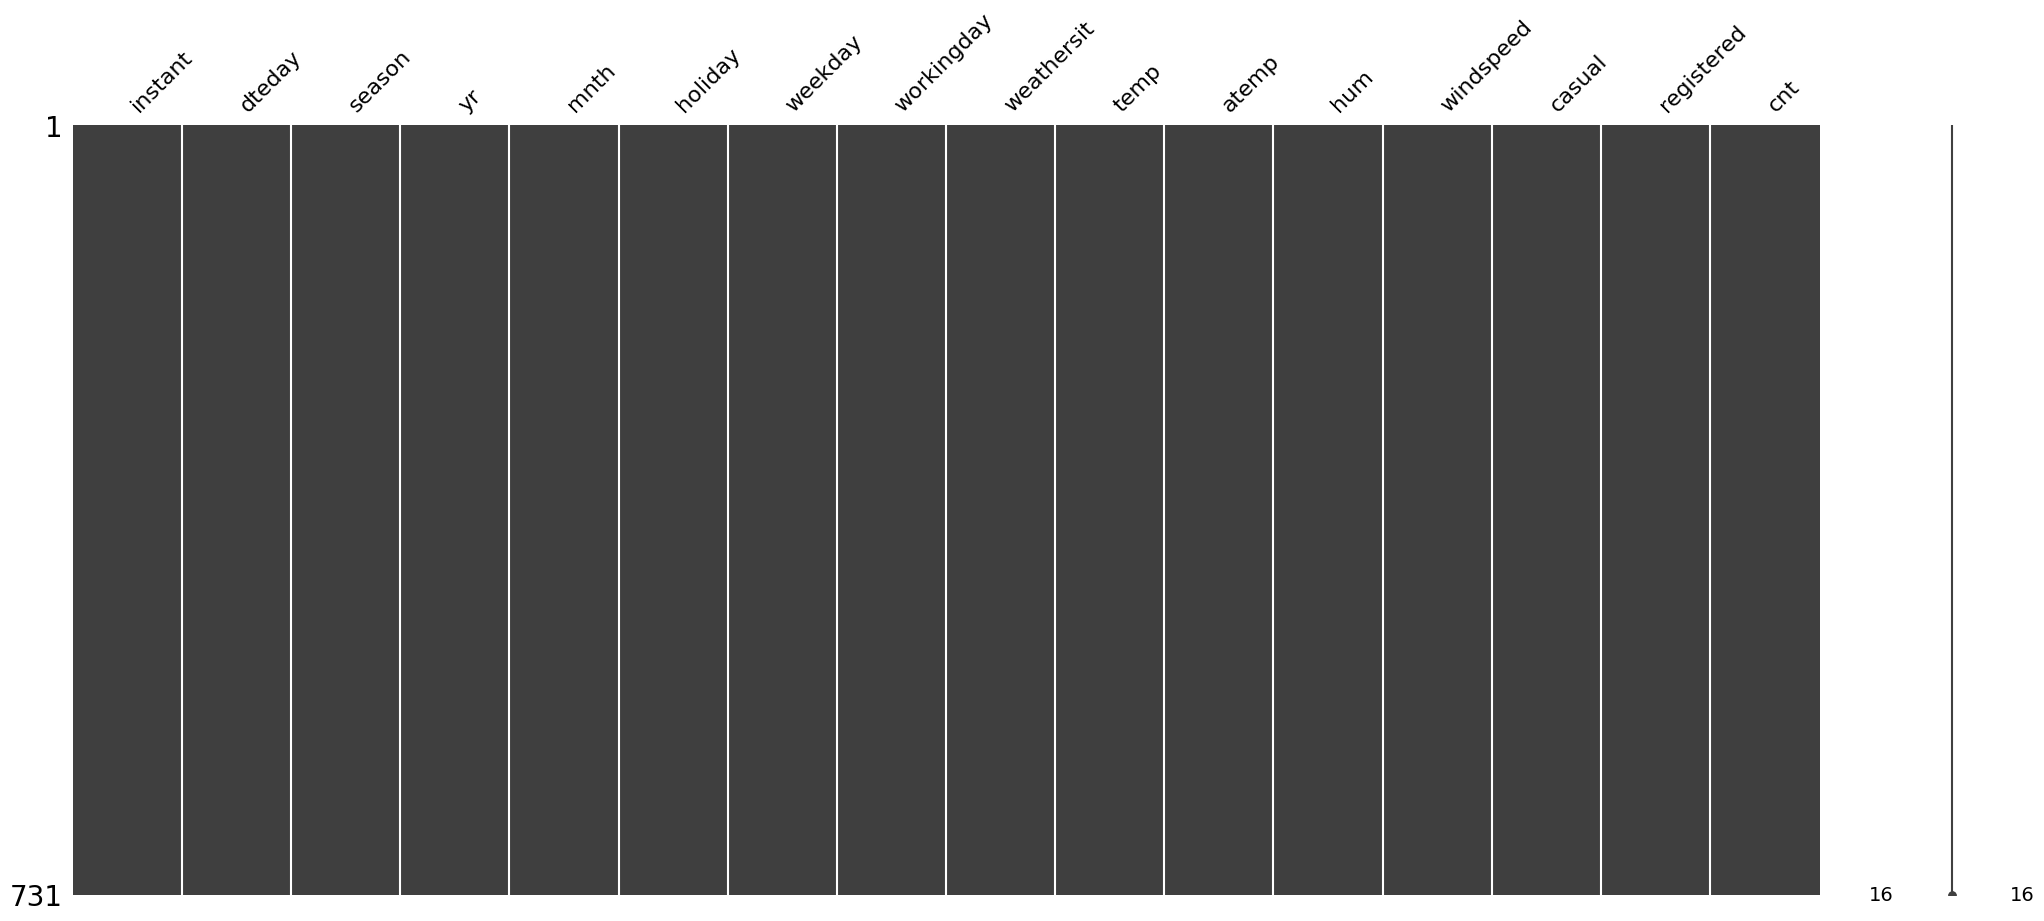

In [64]:
# meskipun data nya tidak ada missing value dan duplikasi saya tetap melakukan proses cleaning data
# berikut merupakan contoh dari cleaning data missing value pada dataset

dataframe1.fillna(value="0", inplace=True)
a=msno.matrix(dataframe1)
plt.savefig("grafik_missingvalue.png")

In [65]:
# berikut merupakan contoh dari cleaning data yang terduplikasi
dataframe1.drop_duplicates(inplace=True)
print("Jumlah yang terduplikasi: ", dataframe1.duplicated().sum())

Jumlah yang terduplikasi:  0


In [66]:
# berikut merupakan contoh dari cleaning data menangani inaccurate value
# dataframe1.season.replace(dataframe1.season.max(), 50, inplace=True)
# menggunakan metode replace()

## Exploratory Data Analysis (EDA)

### Explore ...

saya akan mengeksplorasi dataset ini untuk melihat secara garis besar tentang pertanyaan diatas.

In [67]:
# mengekplor dataset day.csv dapat dimulai dengan melihat parameter statistik dari datframenya
dataframe1.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- Terlihat rata rata pelanggan melakukan peminjaman sepeda berada di pertengahan antara 2 dan 3, yakni di musim panas(summer) dan gugur(fall), sehingga bisa kita simpulkan bahwa pelanggan lebih sering meminjam sepeda pada musim panas dan gugur.
- Dikarenakan banyak pelanggan yang aktif pada musim panas dan gugur maka dapat dipastikan ada faktor yang mempengaruhi pelanggan dalam melakukan peminjaman sepeda sepreti suhu, cuaca, dan kecepatan angin.

In [68]:
# melihat demografi pelanggan di bisnis peminjaman sepeda dengan menggunakan faktor working day dan cnt
dataframe1.groupby(by="workingday").agg({
    "dteday": ["nunique"],
    "workingday": ["max", "min", "mean", "std"]
}).rename(columns={"dteday": "hari"}) # mengubah kolom dteday menjadi hari

hari workingday              
           nunique        max min mean  std
workingday                                 
0              231          0   0  0.0  0.0
1              500          1   1  1.0  0.0

- Terlihat untuk demografi pelanggan terbagi menjadi 2 yakni pelanggan yang datang meminjam pada weekend/holiday dan pada weekday, untuk angka 1 akan menunjukan pelanggan yang meminjam pada weekend/holiday.
- Untuk angka 0 akan menunjukan pelanggan yang meminjam sepeda pada weekday.

In [69]:
# melihat persebaran pelanggan di tahun 2011 dan 2012, angka 0 merujuk pada tahun 2011 dan 1 merujuk pada 2012
# Grouping dan menghitung jumlah unik dari instant untuk setiap tahun
dataframe1.groupby(by="yr").instant.nunique().sort_values(ascending=False)

yr
1    366
0    365
Name: instant, dtype: int64

- di tahun 2011 sebanyak 366 pelanggan telah melakukan peminjaman sepeda
- di tahun 2012 sebanyak 365 pelanggan telah melakukan peminjaman sepeda

In [70]:
# melihat persebaran pelanggan pada setiap bulan di tahun 2011
data_2011 = dataframe1[dataframe1["yr"] == 0]
# Grouping dan menghitung jumlah unik dari instant untuk setiap bulan
pelanggan_per_bulan_2011 = data_2011.groupby(by="mnth")["instant"].nunique().sort_values(ascending=False)
print(pelanggan_per_bulan_2011)

mnth
1     31
3     31
5     31
7     31
8     31
10    31
12    31
4     30
6     30
9     30
11    30
2     28
Name: instant, dtype: int64


- untuk persebaran pelanggan pada setiap bulan di tahun 2011 sebagai berikut

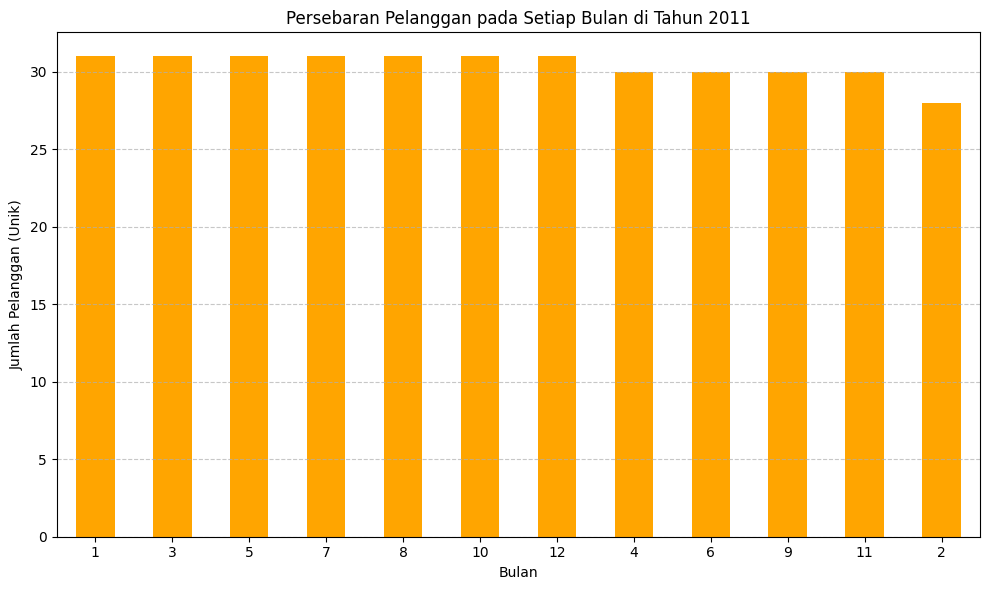

In [71]:
# Data persebaran pelanggan pada setiap bulan di tahun 2011
pelanggan_per_bulan_2011 = data_2011.groupby(by="mnth")["instant"].nunique().sort_values(ascending=False)

# Plot grafik bar
plt.figure(figsize=(10, 6))
pelanggan_per_bulan_2011.plot(kind="bar", color="orange")
plt.title("Persebaran Pelanggan pada Setiap Bulan di Tahun 2011")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pelanggan (Unik)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [72]:
# melihat persebaran pelanggan pada setiap bulan di tahun 2012
data_2012 = dataframe1[dataframe1["yr"] == 1]
# Grouping dan menghitung jumlah unik dari instant untuk setiap bulan
pelanggan_per_bulan_2012 = data_2012.groupby(by="mnth")["instant"].nunique().sort_values(ascending=False)
print(pelanggan_per_bulan_2012)

mnth
1     31
3     31
5     31
7     31
8     31
10    31
12    31
4     30
6     30
9     30
11    30
2     29
Name: instant, dtype: int64


- untuk persebaran pelanggan pada setiap bulan di tahun 2012 sebagai berikut

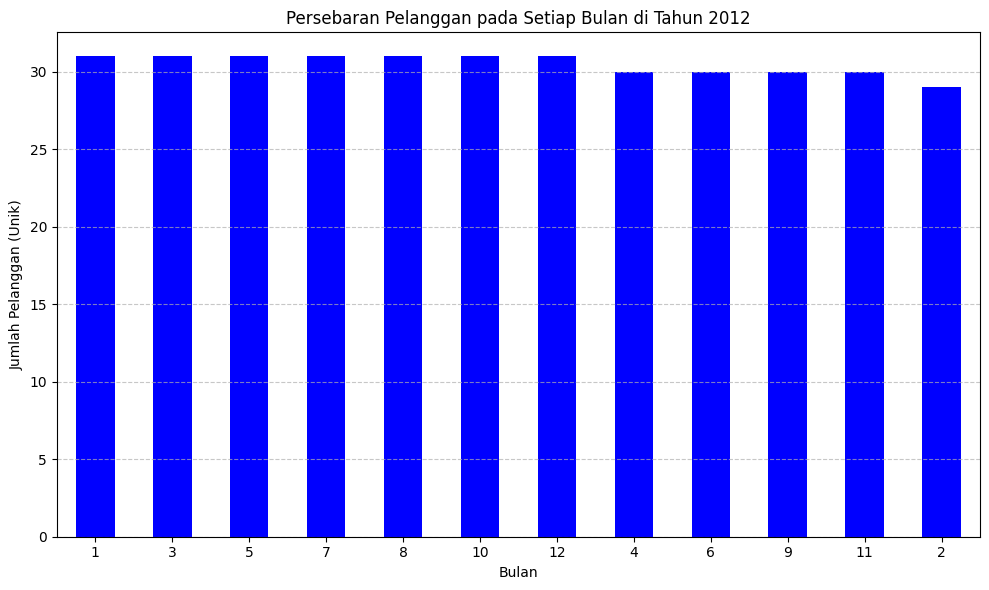

In [73]:
# Data persebaran pelanggan pada setiap bulan di tahun 2012
pelanggan_per_bulan_2012 = data_2012.groupby(by="mnth")["instant"].nunique().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
pelanggan_per_bulan_2012.plot(kind="bar", color="blue")
plt.title("Persebaran Pelanggan pada Setiap Bulan di Tahun 2012")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pelanggan (Unik)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Dari gambar bar chart persebaran pelanggan tiap bulan di tahun 2011 dan 2012 tidak jauh berbeda. Berikut bar chart untuk lebih jelas.

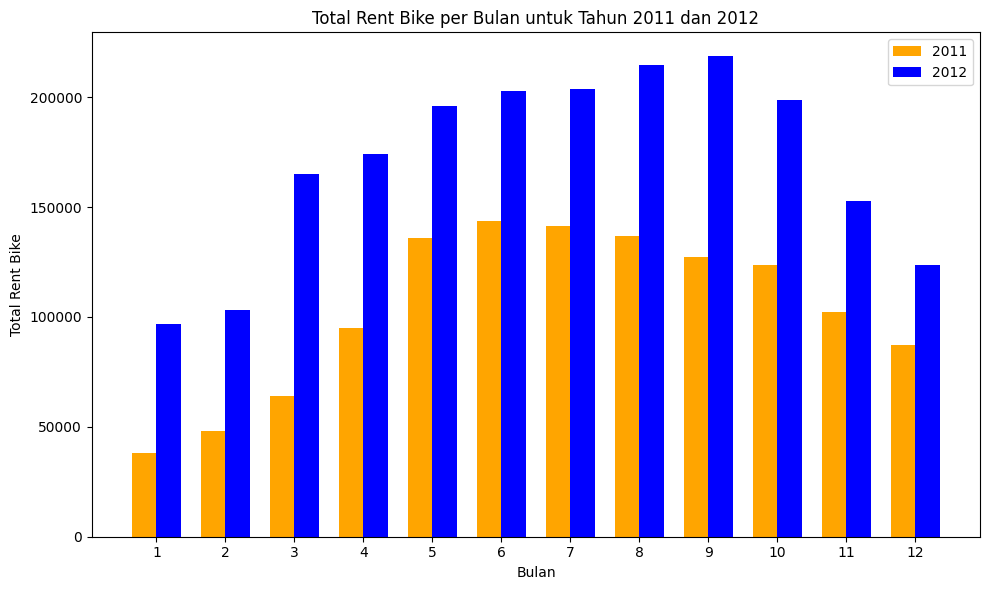

In [74]:
# Filter data untuk tahun 2011 dan 2012
data_2011 = dataframe1[dataframe1["yr"] == 0]  # Anggap 0 merepresentasikan tahun 2011
data_2012 = dataframe1[dataframe1["yr"] == 1]  # Anggap 1 merepresentasikan tahun 2012

# Menghitung rent bike per bulan untuk tahun 2011 dan 2012
rent_per_month_2011 = data_2011.groupby("mnth")["cnt"].sum()
rent_per_month_2012 = data_2012.groupby("mnth")["cnt"].sum()

# Menyiapkan data untuk plot
months = np.arange(1, 13)  # Bulan dari 1 hingga 12
bar_width = 0.35  # Lebar setiap bar chart

# Membuat bar chart side by side
plt.figure(figsize=(10, 6))
plt.bar(months - bar_width/2, rent_per_month_2011, bar_width, color="orange", label="2011")
plt.bar(months + bar_width/2, rent_per_month_2012, bar_width, color="blue", label="2012")

# Menambahkan judul dan label sumbu
plt.title("Total Rent Bike per Bulan untuk Tahun 2011 dan 2012")
plt.xlabel("Bulan")
plt.ylabel("Total Rent Bike")
plt.xticks(months)
plt.legend()  # Menampilkan legenda
plt.tight_layout()
plt.show()

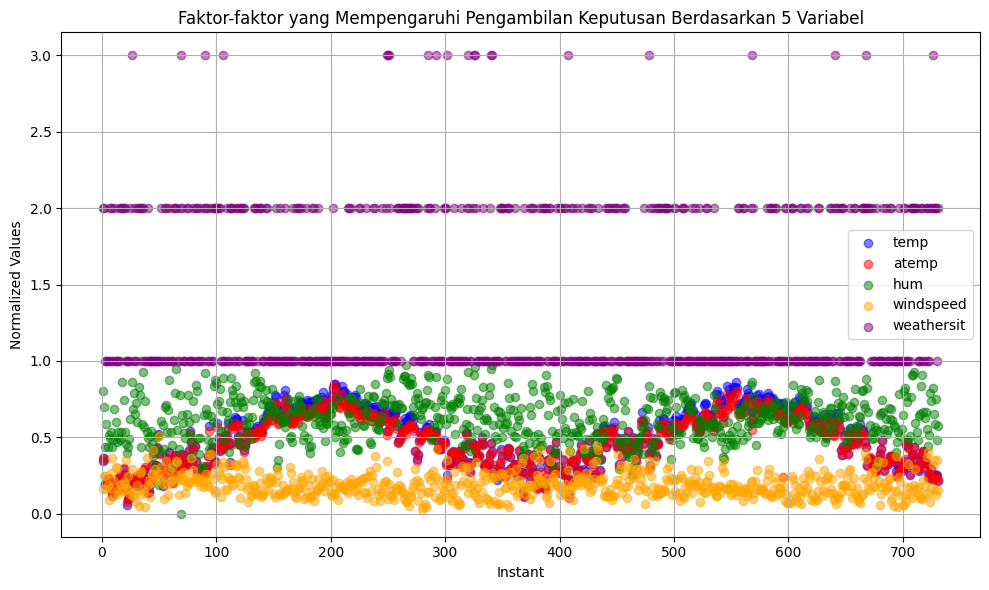

In [75]:
# membuat demografi yang melibatkan 5 faktor pelanggan dalam melakukan peminjaman sepeda
plt.figure(figsize=(10, 6))

# Menambahkan scatter plot untuk variabel temp
plt.scatter(dataframe1["instant"], dataframe1["temp"], alpha=0.5, color="blue", label="temp")

# Menambahkan scatter plot untuk variabel atemp
plt.scatter(dataframe1["instant"], dataframe1["atemp"], alpha=0.5, color="red", label="atemp")

# Menambahkan scatter plot untuk variabel hum
plt.scatter(dataframe1["instant"], dataframe1["hum"], alpha=0.5, color="green", label="hum")

# Menambahkan scatter plot untuk variabel windspeed
plt.scatter(dataframe1["instant"], dataframe1["windspeed"], alpha=0.5, color="orange", label="windspeed")

# Menambahkan scatter plot untuk variabel weathersit
plt.scatter(dataframe1["instant"], dataframe1["weathersit"], alpha=0.5, color="purple", label="weathersit")

# Menambahkan judul dan label sumbu
plt.title("Faktor-faktor yang Mempengaruhi Pengambilan Keputusan Berdasarkan 5 Variabel")
plt.xlabel("Instant")
plt.ylabel("Normalized Values")
plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

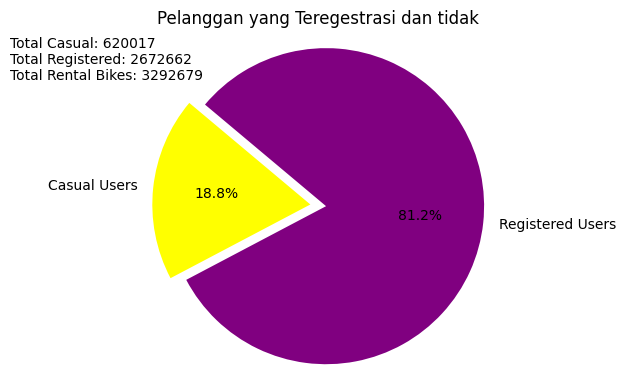

In [76]:
# Menghitung total casual, registered, dan cnt berdasarkan instant
dataframe1["total"] = dataframe1["casual"] + dataframe1["registered"]
total_casual = dataframe1["casual"].sum()
total_registered = dataframe1["registered"].sum()
total_cnt = dataframe1["total"].sum()

# Menyiapkan data untuk pie chart
labels = ["Casual Users", "Registered Users"]
sizes = [total_casual / total_cnt, total_registered / total_cnt]
colors = ["yellow", "purple"]
explode = (0.1, 0)  # Memberikan efek exploded pada bagian pertama (Casual Users)

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Pelanggan yang Teregestrasi dan tidak")

# Menambahkan informasi total cnt di sekitar pie chart
plt.text(-2, 1, f"Total Casual: {total_casual}", fontsize=10, color="black")
plt.text(-2, 0.9, f"Total Registered: {total_registered}", fontsize=10, color="black")
plt.text(-2, 0.8, f"Total Rental Bikes: {total_cnt}", fontsize=10, color="black")

plt.axis("equal")  # Menyamakan sumbu x dan y agar pie chart terlihat seperti lingkaran
plt.tight_layout()
plt.show()

In [77]:
# Persentase pertumbuhan pelanggan dari 2011 ke 2012
count_2011 = dataframe1[dataframe1["yr"] == 0]["cnt"].sum()  # Anggap 0 merepresentasikan tahun 2011
count_2012 = dataframe1[dataframe1["yr"] == 1]["cnt"].sum()  # Anggap 1 merepresentasikan tahun 2012

# Menghitung persentase pertumbuhan
percentage_growth = ((count_2012 - count_2011) / count_2011) * 100

print("Persentase Pertumbuhan Pelanggan dari 2011 ke 2012:", round(percentage_growth, 2), "%")

Persentase Pertumbuhan Pelanggan dari 2011 ke 2012: 64.88 %


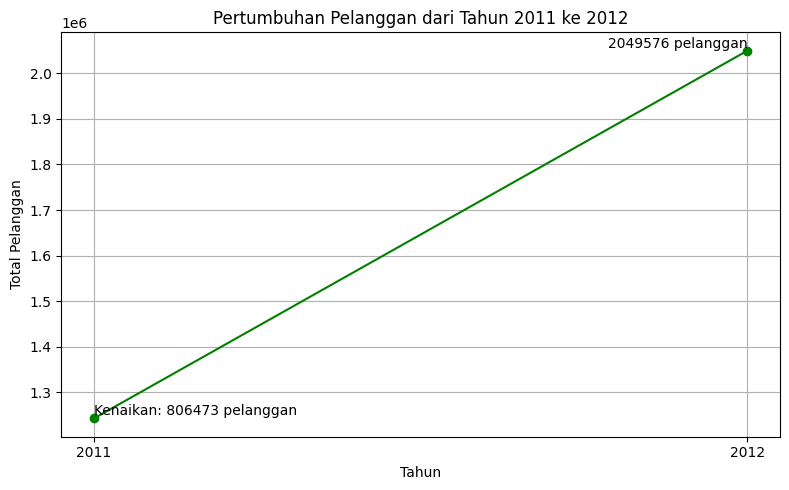

In [78]:
# Menghitung total pelanggan untuk tahun 2011 dan 2012
count_2011 = dataframe1[dataframe1["yr"] == 0]["cnt"].sum()  # Anggap 0 merepresentasikan tahun 2011
count_2012 = dataframe1[dataframe1["yr"] == 1]["cnt"].sum()  # Anggap 1 merepresentasikan tahun 2012

# Menyiapkan data untuk plot
years = [2011, 2012]
counts = [count_2011, count_2012]

# Menghitung kenaikan pelanggan dari tahun 2011 ke 2012
increase = count_2012 - count_2011

# Membuat grafik garis
plt.figure(figsize=(8, 5))
plt.plot(years, counts, marker="o", color="green", linestyle="-")

# Menambahkan judul dan label sumbu
plt.title("Pertumbuhan Pelanggan dari Tahun 2011 ke 2012")
plt.xlabel("Tahun")
plt.ylabel("Total Pelanggan")
plt.xticks(years)  # Menampilkan label sumbu x sesuai dengan tahun

# Menambahkan teks pada titik akhir garis
plt.text(years[-1], counts[-1], f"{counts[-1]} pelanggan", ha="right", va="bottom")

# Menambahkan teks untuk keterangan kenaikan pelanggan
plt.text(years[0], counts[0], f"Kenaikan: {increase} pelanggan", ha="left", va="bottom")

plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Peminjaman sepeda di musim manakah yang paling tinggi siklus permintaannya oleh pelanggan?

In [79]:
season_mean = dataframe1["season"].mean()

# Menampilkan hasil
print("Rata-rata dari kolom 'season':", "{:.1f}".format(season_mean))

Rata-rata dari kolom 'season': 2.5


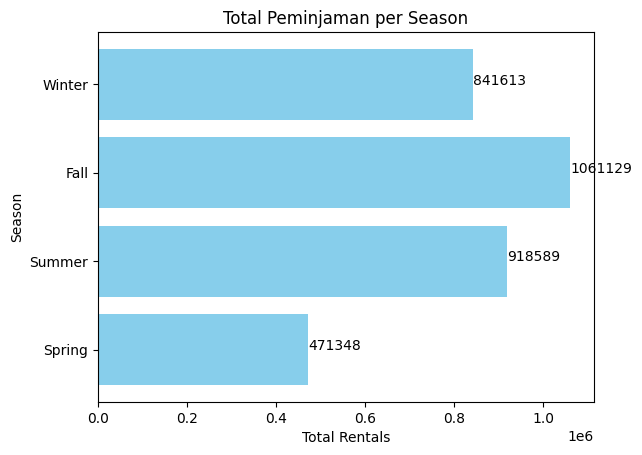

In [80]:
total_rentals_per_season = dataframe1.groupby('season')['cnt'].sum()

# Membuat plot
plt.barh(['Spring', 'Summer', 'Fall', 'Winter'], total_rentals_per_season, color='skyblue')
plt.xlabel('Total Rentals')
plt.ylabel('Season')
plt.title('Total Peminjaman per Season')
# Menambahkan informasi jumlah di setiap bar
for index, value in enumerate(total_rentals_per_season):
    plt.text(value, index, str(value))
plt.show()

Terlihat pelanggan melakukan peminjaman sepeda berada di angka ke 3, yakni di musim panas(summer), dan untuk musim ke 2 yakni  gugur(fall), sehingga bisa kita simpulkan bahwa pelanggan lebih sering meminjam sepeda pada musim panas dan gugur, disusul dengan musim dingin(winter) dan paling sedikit di musim semi(spring)

### Pertanyaan 2: Bagaimana demografi peminjaman pelanggan yang kita miliki selama weekend/holiday dan weekday?

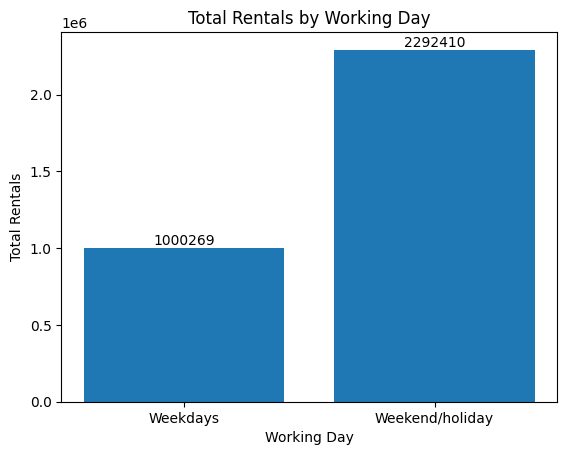

In [81]:
# Menghitung total peminjaman sepeda untuk setiap hari kerja
total_rentals_by_workingday = dataframe1.groupby('workingday')['cnt'].sum()

# Membuat plot
plt.bar(['Weekdays', 'Weekend/holiday'], total_rentals_by_workingday)
plt.title('Total Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Total Rentals')

# Menambahkan informasi jumlah di setiap batang
for i, value in enumerate(total_rentals_by_workingday):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

Terlihat untuk demografi pelanggan terbagi menjadi 2 yakni pelanggan yang datang meminjam pada weekend/holiday dan pada weekday, untuk angka 1 akan menunjukan pelanggan yang meminjam pada weekend/holiday sebesar 2292410.
Untuk angka 0 akan menunjukan pelanggan yang meminjam sepeda pada weekday sebesar 1000269.

### Pertanyaan 3: Faktor manakah yang paling mempengaruhi pelanggan dalam melakukan peminjaman sepeda?

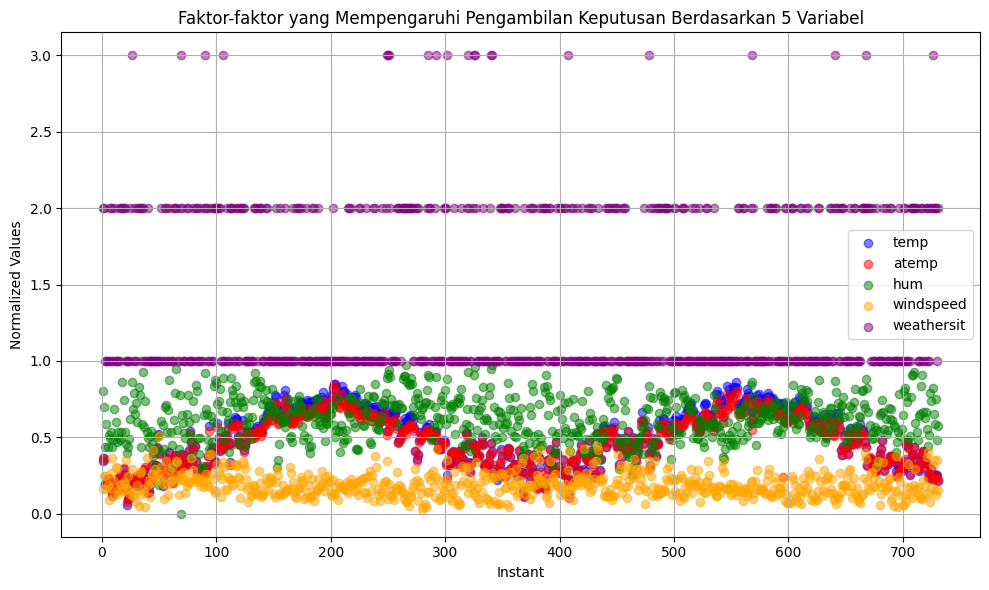

In [82]:
# membuat demografi yang melibatkan 5 faktor pelanggan dalam melakukan peminjaman sepeda
plt.figure(figsize=(10, 6))

# Menambahkan scatter plot untuk variabel temp
plt.scatter(dataframe1["instant"], dataframe1["temp"], alpha=0.5, color="blue", label="temp")

# Menambahkan scatter plot untuk variabel atemp
plt.scatter(dataframe1["instant"], dataframe1["atemp"], alpha=0.5, color="red", label="atemp")

# Menambahkan scatter plot untuk variabel hum
plt.scatter(dataframe1["instant"], dataframe1["hum"], alpha=0.5, color="green", label="hum")

# Menambahkan scatter plot untuk variabel windspeed
plt.scatter(dataframe1["instant"], dataframe1["windspeed"], alpha=0.5, color="orange", label="windspeed")

# Menambahkan scatter plot untuk variabel weathersit
plt.scatter(dataframe1["instant"], dataframe1["weathersit"], alpha=0.5, color="purple", label="weathersit")

# Menambahkan judul dan label sumbu
plt.title("Faktor-faktor yang Mempengaruhi Pengambilan Keputusan Berdasarkan 5 Variabel")
plt.xlabel("Instant")
plt.ylabel("Normalized Values")
plt.legend()  # Menampilkan legenda
plt.grid(True)  # Menampilkan grid
plt.tight_layout()
plt.show()

Dari grafik tersebut weathersit yang mewakili sumbu x dapat dinyatakan cuaca yang sedang terjadi pada waktu kejadian, weathersit juga berkolerasi dengan 4 variabel lainnya seperti temp, atemp, hum, dan windspeed. seperti hum(kelembapan) dan windspeed(kecepatan angin) yang dapat dipengaruhi oleh kondisi cuaca hujan/salju dan suhu, untuk temp dan atemp juga terlihat selalu berdampingan. dari banyaknya faktor faktor pelanggan paling sering melakukan peminjaman di cuaca yang bersih/clear.

### Pertanyaan 4: Seberapa banyak pelanggan yang tertarik pada pembuatan akun member dari bisnis peminjaman sepeda ini?

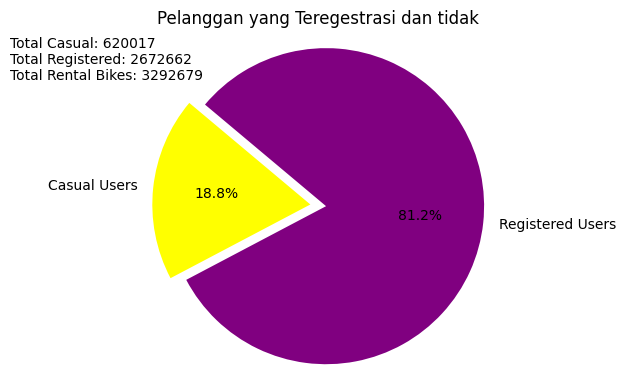

In [83]:
# Menghitung total casual, registered, dan cnt berdasarkan instant
dataframe1["total"] = dataframe1["casual"] + dataframe1["registered"]
total_casual = dataframe1["casual"].sum()
total_registered = dataframe1["registered"].sum()
total_cnt = dataframe1["total"].sum()

# Menyiapkan data untuk pie chart
labels = ["Casual Users", "Registered Users"]
sizes = [total_casual / total_cnt, total_registered / total_cnt]
colors = ["yellow", "purple"]
explode = (0.1, 0)  # Memberikan efek exploded pada bagian pertama (Casual Users)

# Membuat pie chart
plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Pelanggan yang Teregestrasi dan tidak")

# Menambahkan informasi total cnt di sekitar pie chart
plt.text(-2, 1, f"Total Casual: {total_casual}", fontsize=10, color="black")
plt.text(-2, 0.9, f"Total Registered: {total_registered}", fontsize=10, color="black")
plt.text(-2, 0.8, f"Total Rental Bikes: {total_cnt}", fontsize=10, color="black")

plt.axis("equal")  # Menyamakan sumbu x dan y agar pie chart terlihat seperti lingkaran
plt.tight_layout()
plt.show()

diketahui sebanyak 81,2% total user/pelanggan sudah melakukan registrasi member di peminjaman sepeda dan sisasnya 18,8% belum melakukan registrasi member.

### Pertanyaan 5: Berapa persentase kenaikan pelanggan dari tahun 2011 ke 2012? Apakah profit atau tidak?

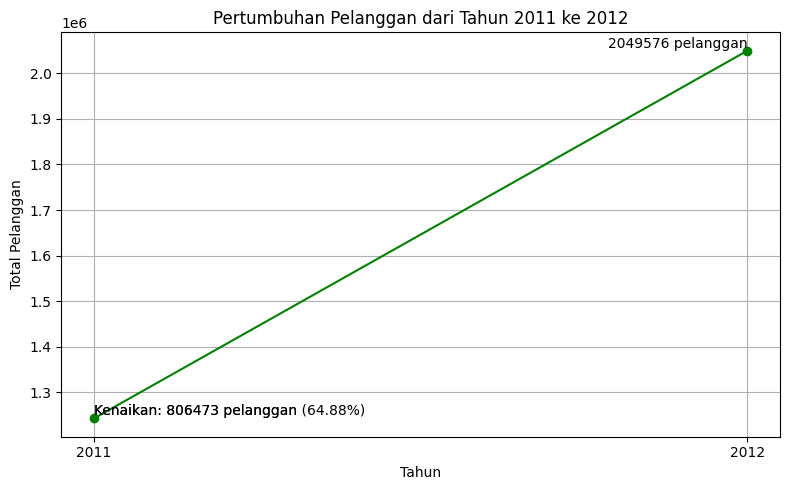

In [84]:
# Menghitung total pelanggan untuk tahun 2011 dan 2012
count_2011 = dataframe1[dataframe1["yr"] == 0]["cnt"].sum()  # Anggap 0 merepresentasikan tahun 2011
count_2012 = dataframe1[dataframe1["yr"] == 1]["cnt"].sum()  # Anggap 1 merepresentasikan tahun 2012

# Menyiapkan data untuk plot
years = [2011, 2012]
counts = [count_2011, count_2012]

# Menghitung kenaikan pelanggan dari tahun 2011 ke 2012
increase = count_2012 - count_2011

# Membuat grafik garis
plt.figure(figsize=(8, 5))
plt.plot(years, counts, marker="o", color="green", linestyle="-")

# Menambahkan judul dan label sumbu
plt.title("Pertumbuhan Pelanggan dari Tahun 2011 ke 2012")
plt.xlabel("Tahun")
plt.ylabel("Total Pelanggan")
plt.xticks(years)  # Menampilkan label sumbu x sesuai dengan tahun

# Menambahkan teks pada titik akhir garis
plt.text(years[-1], counts[-1], f"{counts[-1]} pelanggan", ha="right", va="bottom")

# Menambahkan teks untuk keterangan kenaikan pelanggan
plt.text(years[0], counts[0], f"Kenaikan: {increase} pelanggan", ha="left", va="bottom")

plt.grid(True)  # Menampilkan grid
plt.tight_layout()
# Menghitung persentase pertumbuhan pelanggan
plt.text(2011, count_2011, f"Kenaikan: {increase} pelanggan ({round((increase / count_2011) * 100, 2)}%)", ha="left", va="bottom")
plt.show()

Dari tahun 2011 hingga 2012 bisnis peminjaman sepeda ini sudah naik sebanyak 64,88% dari pelanggan sebelumnya. hingga mencapai total 2049576 pelanggan. Dapat dikatakan untung dalam bisnis/profit.

### Pertanyaan 6: Bagaimana data persebaran pelanggan di tahun 2011 dan 2012?

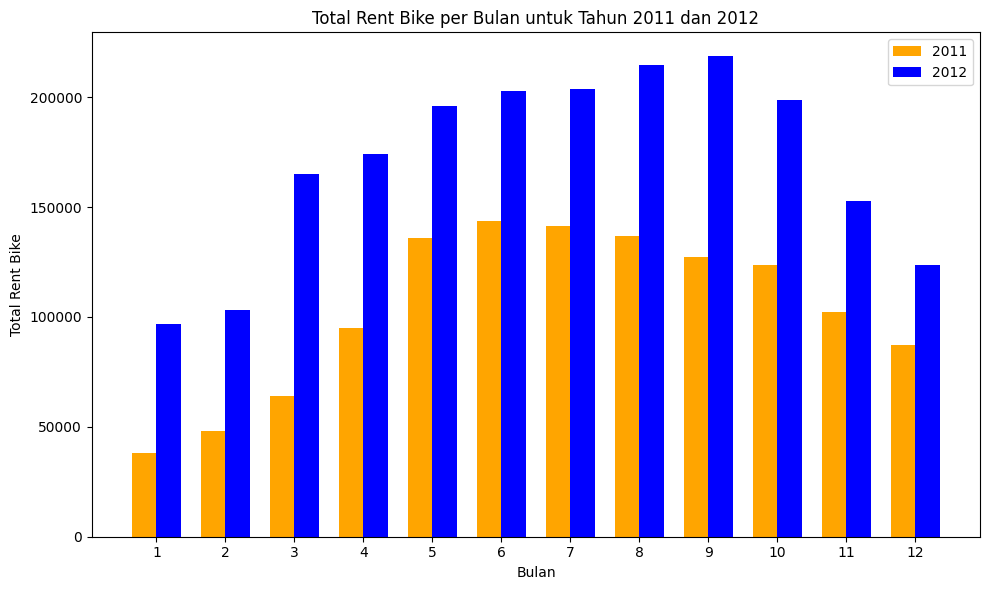

In [85]:
# Filter data untuk tahun 2011 dan 2012
data_2011 = dataframe1[dataframe1["yr"] == 0]  # Anggap 0 merepresentasikan tahun 2011
data_2012 = dataframe1[dataframe1["yr"] == 1]  # Anggap 1 merepresentasikan tahun 2012

# Menghitung rent bike per bulan untuk tahun 2011 dan 2012
rent_per_month_2011 = data_2011.groupby("mnth")["cnt"].sum()
rent_per_month_2012 = data_2012.groupby("mnth")["cnt"].sum()

# Menyiapkan data untuk plot
months = np.arange(1, 13)  # Bulan dari 1 hingga 12
bar_width = 0.35  # Lebar setiap bar chart

# Membuat bar chart side by side
plt.figure(figsize=(10, 6))
plt.bar(months - bar_width/2, rent_per_month_2011, bar_width, color="orange", label="2011")
plt.bar(months + bar_width/2, rent_per_month_2012, bar_width, color="blue", label="2012")

# Menambahkan judul dan label sumbu
plt.title("Total Rent Bike per Bulan untuk Tahun 2011 dan 2012")
plt.xlabel("Bulan")
plt.ylabel("Total Rent Bike")
plt.xticks(months)
plt.legend()  # Menampilkan legenda
plt.tight_layout()
plt.show()

Berikut merupakan data persebaran pelanggan di tahun 2011 dan 2012 dari pertanyaan sebelumnya juga terlihat bahwa pelanggan di tahun 2012 lebih banyak ketimbang tahun sebelumnya.

## Conclusion

- Conclution pertanyaan 1:
Musim panas(summer) merupakan musim yang paling sering dikunjungi oleh pelanggan untuk meminjam sepeda.

- Conclution pertanyaan 2:
Pelanggan lebih sering meminjam sepedea pada weekend/holiday, dengan jumlah sebesar 2292410 pelanggan pada weekend/holiday.

- Conclution pertanyaan 3:
Faktor yang mempengaruhi pelanggan dalam mengambil keputusan yakni cuaca dengan beberapa variabel lainnya seperti kecepatan angin, suhu, dan kelembapan semuanya sangat berkolerasi.

- Conclution pertanyaan 4:
Sebanyak 2672662 user/pelanggan sudah meregistrasikan akunnya/member ke pihak peminjaman sepeda.

- Conclution pertanyaan 5:
Persentase kenaikan pelanggan naik sebanyak 64,88% dari jumlah pelanggan di tahun sebelumnya(2011). hingga mencapai total 2049576 pelanggan. Tentunya dengan kenaikan yang besar ini sangat profit bagi bisnis.

- Conclution pertanyaan 6:
Persebaran pelanggan di tahun 2011 dan 2012 dari pertanyaan sebelumnya juga terlihat bahwa pelanggan di tahun 2012 lebih banyak ketimbang tahun sebelumnya.